In [66]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

x = diabetes.data[:, 2]
y = diabetes.target

class Neuron:
    
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    def backprop(self, x, err):
        w_grad = -1 * x * err
        # derivative of squared error in terms of w is '-x(y-y_hat)'
        # This is same as -w_rate * err
        b_grad = -1 * 1 * err
        # derivative of squared error in terms of b is -(y-y_hat)
        # which is -1 * err
        return w_grad, b_grad
        
    def fit(self, x, y, epochs=100):
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = (y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w = self.w - w_grad
                self.b = self.b - b_grad

In [69]:
neuron = Neuron()
neuron.fit(x, y)

In [70]:
print(neuron.w, neuron.b)

913.5973364345905 123.39414383177204


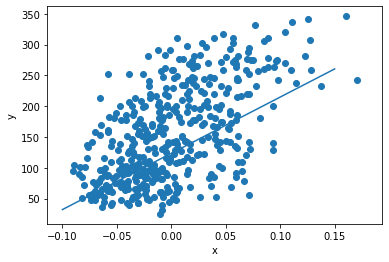

In [68]:
import matplotlib.pyplot as plt


plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()